##Exercício - Decision Trees - Detecção de notas falsas
Disciplina de Data Mining - INE5644 - INE/UFSC

Prof. Jônata Tyska Carvalho



In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

import graphviz
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

%matplotlib inline

### 0. Carregamento do conjunto de dados

informações sobre os dados em: https://archive.ics.uci.edu/ml/datasets/banknote+authentication

imagens 400x400 - features extraídas usando transformadas wavelet

In [55]:
url = "https://codigos.ufsc.br/jonata.tyska/repositorio/-/raw/master/datasets/bill_authentication.csv"

# Read dataset to pandas dataframe
dataset = pd.read_csv(url)

dataset.shape

(1372, 5)

**1. Visualizar algumas instâncias do conjunto de dados**

In [56]:
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


**2. Visualizar medidas de estatística descritiva de cada um dos atributos do conjunto de dados**

In [57]:
dataset.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


**3. Dividir o conjunto de dados em atributos (X) e variável alvo (y)**

In [58]:
# Separando recursos (X) e rótulos (y)
X = dataset[['Variance', 'Skewness', 'Curtosis', 'Entropy']]
y = dataset['Class']

**4. Dividir o conjunto de dados em treino e teste (X_train,y_train,X_test,y_test)**

In [59]:
# Dividindo o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**5. Construir o modelo usando o conjunto de dados de treinamento**

In [60]:
# Criando e treinando o modelo de árvore de decisão
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**6. Realizar a predição usando o conjunto de teste (X_test)**

In [61]:
# Fazendo predições no conjunto de teste
y_pred = model.predict(X_test)

**7. Avaliar o desempenho do modelo construído (usando o y_test e o y_pred)**

In [62]:
# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

Acurácia do modelo: 0.98


**8. Visualizar a árvore gerada**

In [63]:
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

In [64]:
# export_graphviz(model, None)

In [65]:
dot_data = export_graphviz(model,out_file=None,feature_names=list(X.columns.values),
                           class_names = ['Falso','Verdadeiro'], rounded = True, filled = True)

In [66]:
graph = pydotplus.graph_from_dot_data(dot_data)

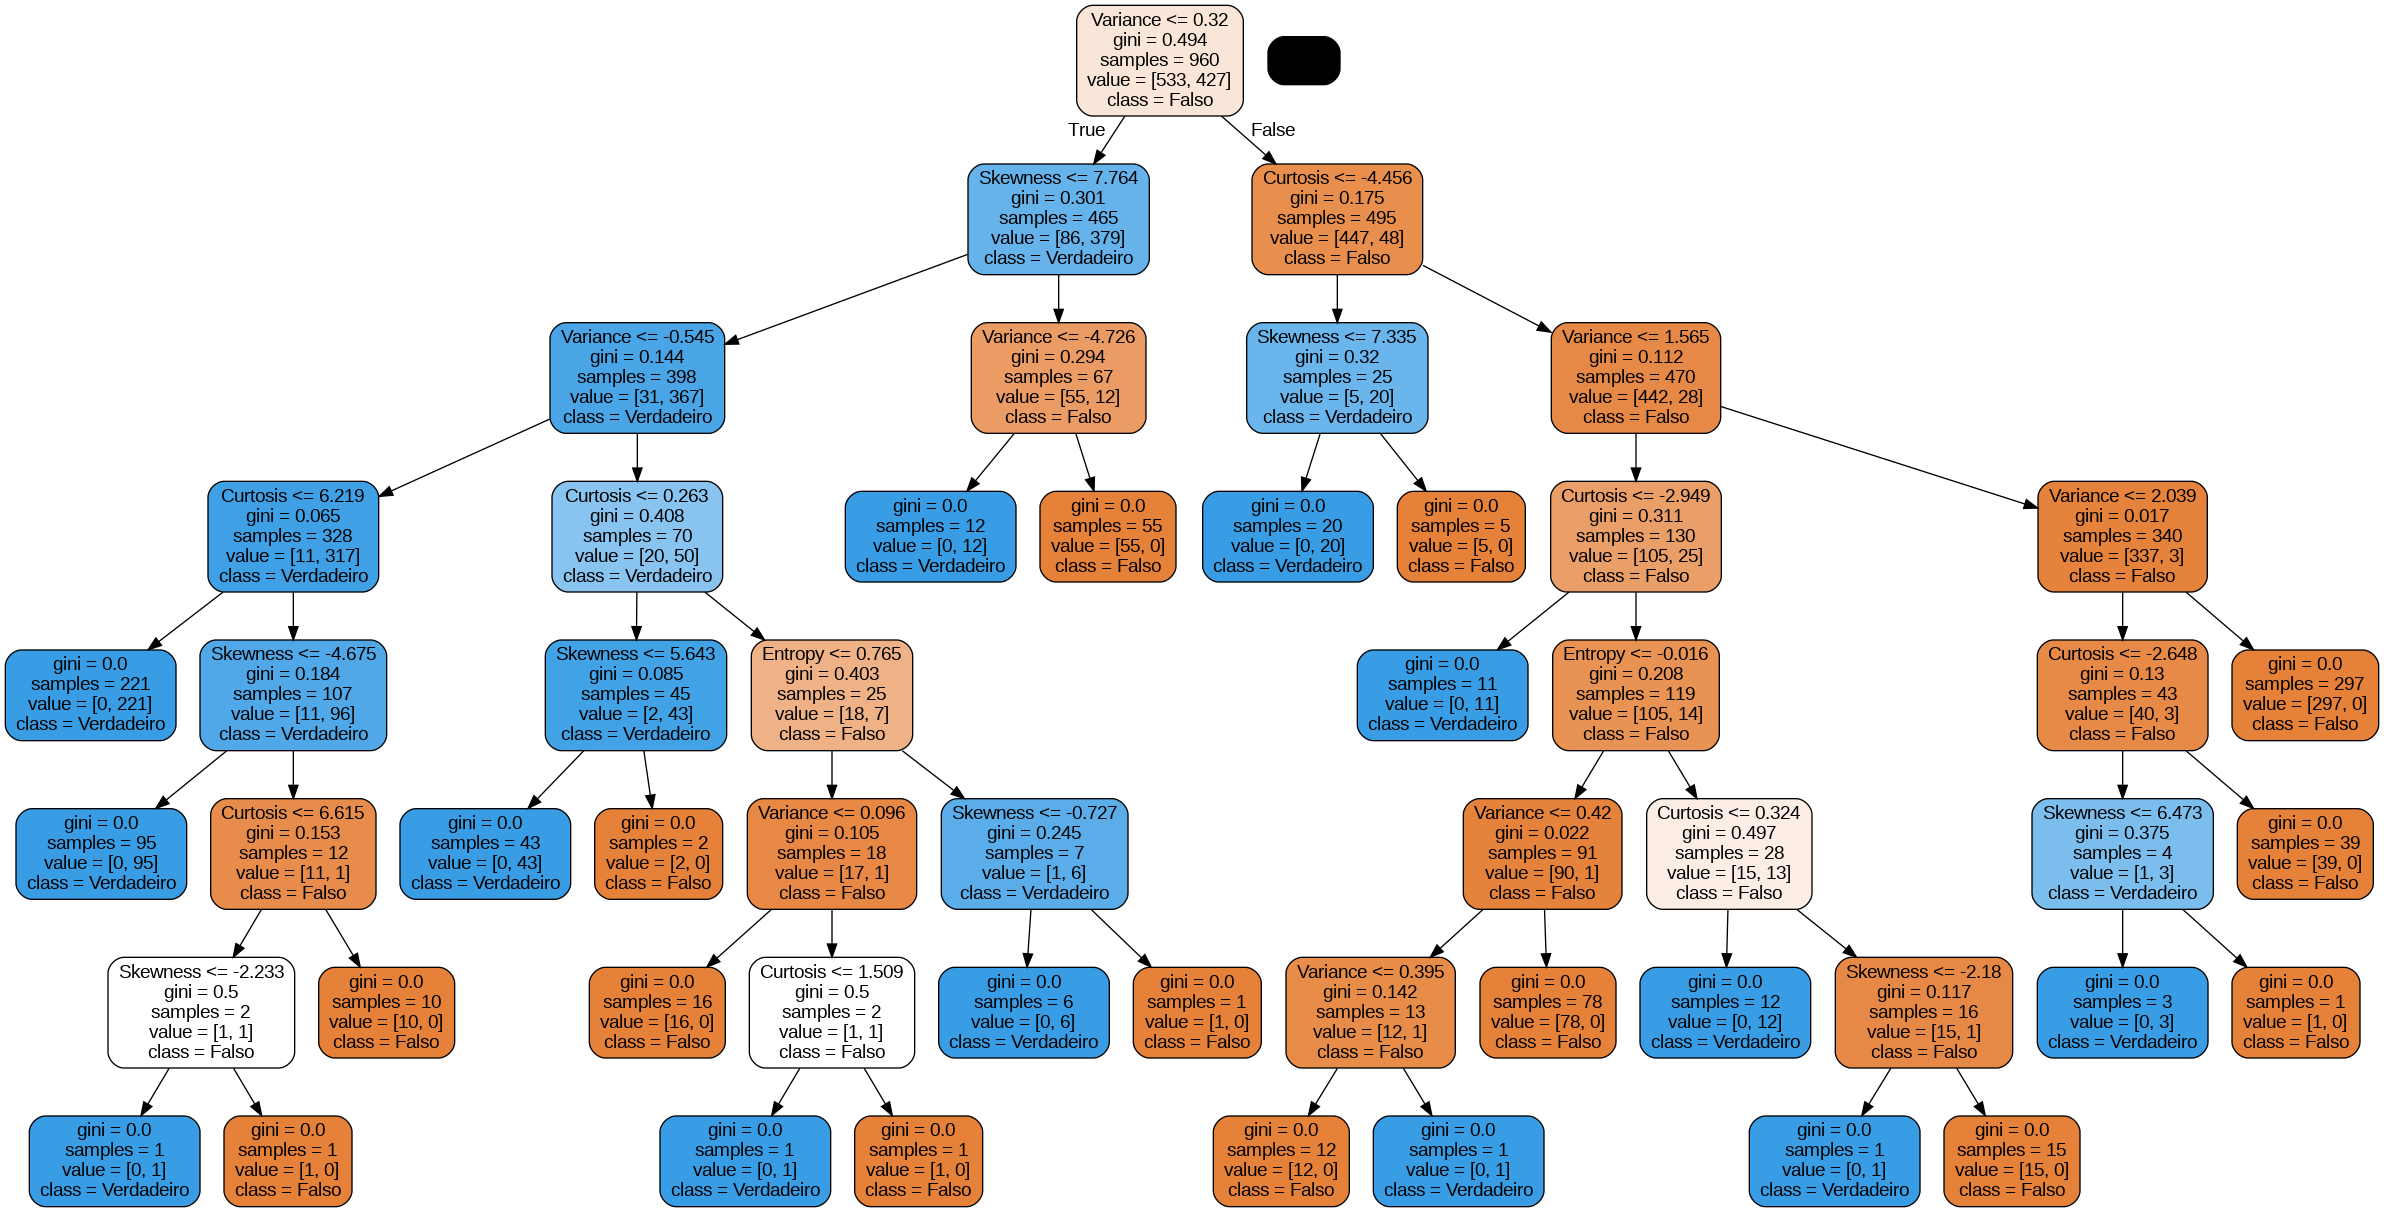

In [67]:
Image(graph.create_png())